In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# Define a custom brown color palette
brown_palette = ["#8B4513", "#A0522D", "#D2691E", "#CD853F", "#F4A460", "#DEB887"]

In [3]:
# Load the dataset
coffee_data = pd.read_csv("index.csv")

# Display the first few rows of the dataset
print(coffee_data.head())

# Check for missing values
print(coffee_data.info())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   co

In [4]:
# Convert 'date' and 'datetime' columns to datetime format
coffee_data['date'] = pd.to_datetime(coffee_data['date'])
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

# Fill missing values in the 'card' column
coffee_data['card'].fillna('unknown', inplace=True)

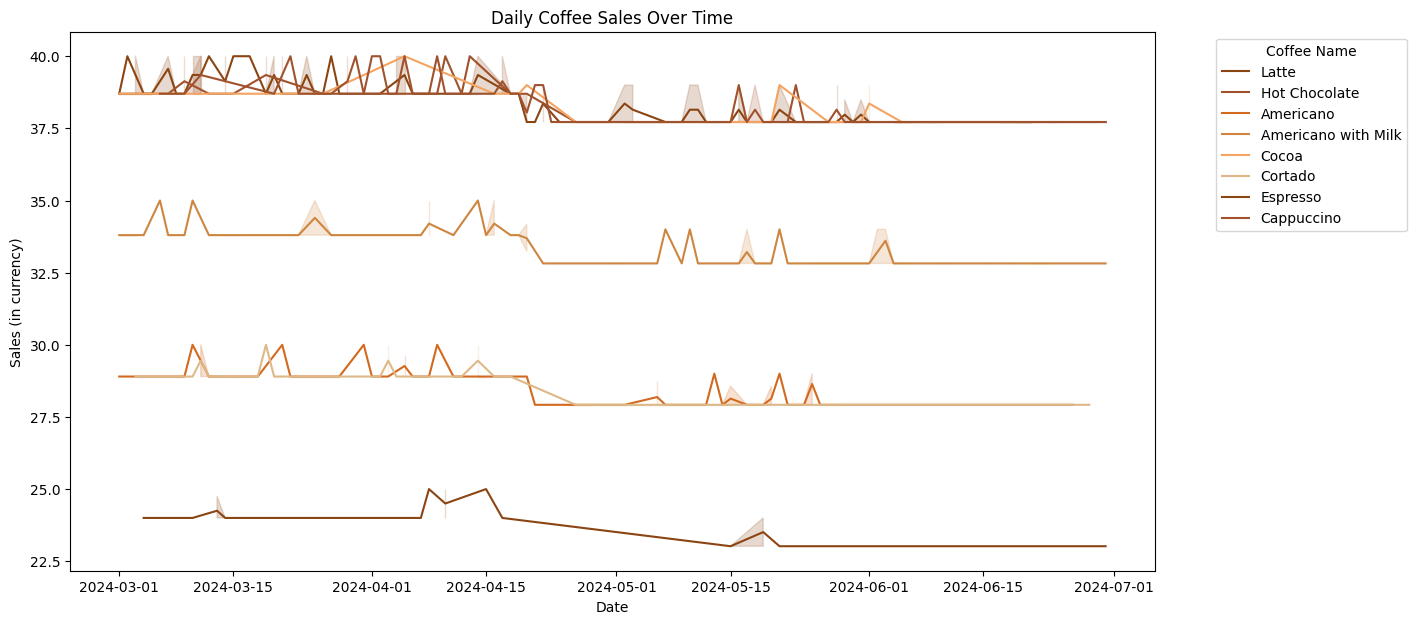

In [5]:
# Plot sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=coffee_data, x='date', y='money', hue='coffee_name', palette=brown_palette)
plt.title('Daily Coffee Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (in currency)')
plt.legend(title='Coffee Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


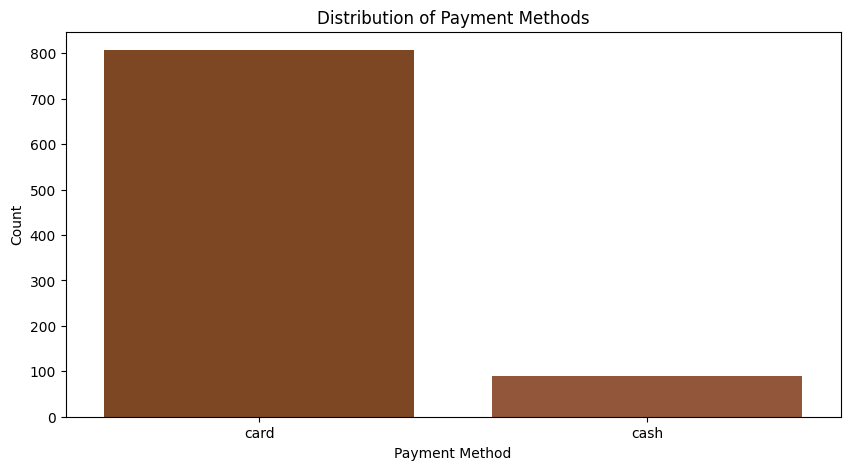

In [6]:
# Plot distribution of payment methods
plt.figure(figsize=(10, 5))
sns.countplot(data=coffee_data, x='cash_type', palette=brown_palette)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

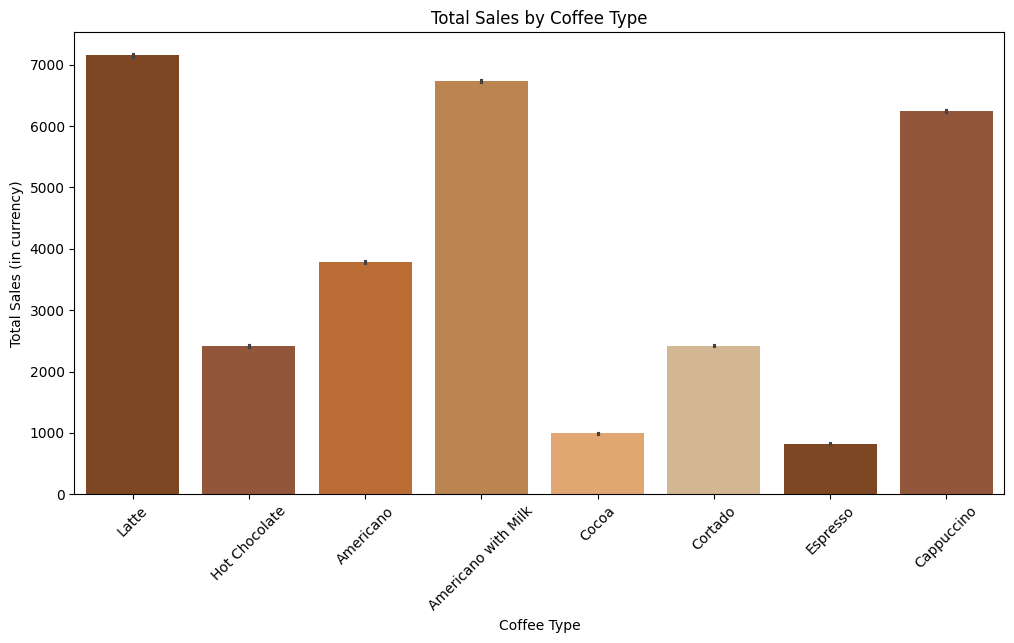

In [7]:
# Plot sales by coffee type
plt.figure(figsize=(12, 6))
sns.barplot(data=coffee_data, x='coffee_name', y='money', estimator=sum, palette=brown_palette)
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Sales (in currency)')
plt.xticks(rotation=45)
plt.show()


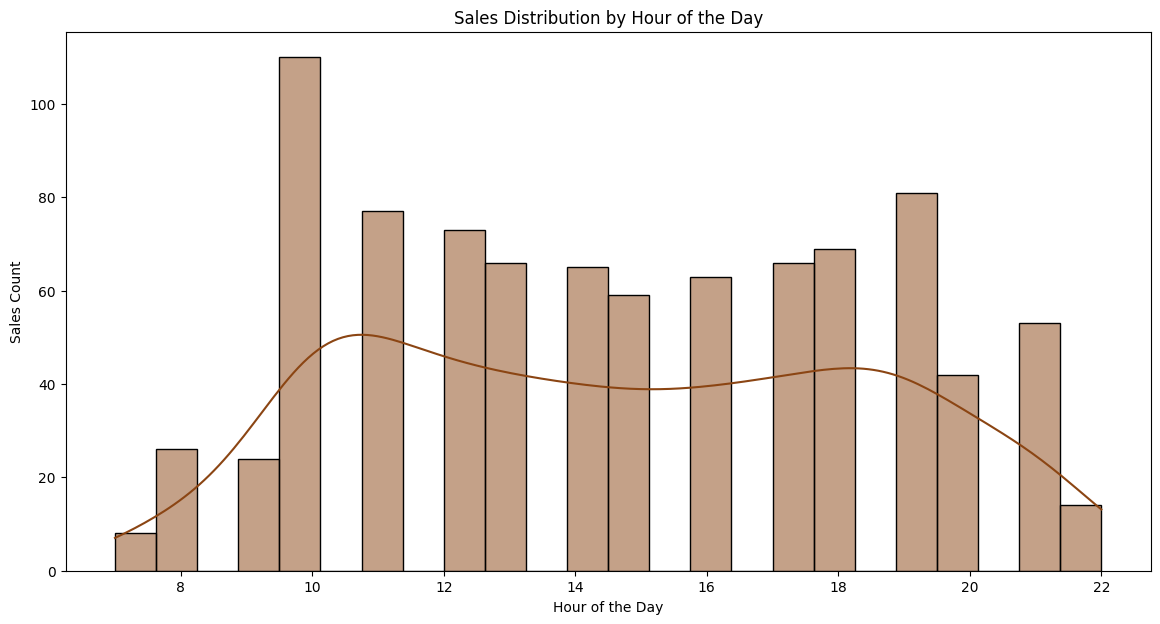

In [8]:
# Extract hour from datetime
coffee_data['hour'] = coffee_data['datetime'].dt.hour

# Plot sales distribution by hour of the day
plt.figure(figsize=(14, 7))
sns.histplot(data=coffee_data, x='hour', kde=True, bins=24, color='#8B4513')
plt.title('Sales Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Count')
plt.show()
